# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [1]:
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt

v_1 = [2,2]
v_2 = [-2,-2]
plt.axes().set_aspect('equal')
plt.arrow(0,0,v_1[0],v_1[1],head_width=0.09,head_length=0.09,color='red')
plt.arrow(0,0,v_2[0],v_2[1],head_width=0.09,head_length=0.09,color='red')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('PASS')
plt.show()

<Figure size 640x480 with 1 Axes>

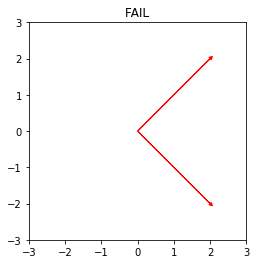

In [2]:
v_1 = [2,2]
v_2 = [2,-2]
plt.axes().set_aspect('equal')
plt.arrow(0,0,v_1[0],v_1[1],head_width=0.09,head_length=0.09,color='red')
plt.arrow(0,0,v_2[0],v_2[1],head_width=0.09,head_length=0.09,color='red')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('FAIL')
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because the functions that do not pass the vertical line test show that there are two inputs that map to the same output (where x = 2)

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Well I know for sure 1,3,4 are not because they are just like the example fail graph above

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

The dimensionality for the domain of m is: 3
The dimensionality for the codomain of m is: 3
The dimensionality for the domain of n is: 4
The dimensionality for the codomain of n is: 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

The way I look at it is how the dimensional spaces are visualized. Like if the visualization was on a 2d plane the way to visualize the 3d place would be to add a new axis, or new position to the existing points on the 2d plane. So to explain it easier, the 2d vectors A and B where A = [1,2] and B = [0,1] have a position of 0 in the 3 dimensional plane. Just a guess, i'm honestly not really sure.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = x_1\begin{bmatrix} 1 \\ -1 \end{bmatrix} + x_2\begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

\begin{align}
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3 \end{bmatrix}) = x_1\begin{bmatrix} 4 \\ -1 \\ 5 \end{bmatrix} + x_2\begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix} x_3\begin{bmatrix} 2 \\ 3 \\ -2 \end{bmatrix}
\end{align}

\begin{align}
Tp = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix} 
\end{align}

\begin{align}
Tq = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [3]:
# soon

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvector = a vector that cannot be manipulated in any other direction, but can be transformed by either its initial scalar the eigenvalue, or by another scalar.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

1) can't really graph higher dimensions easily
2) hard for humans to visualize higher dimensions

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

IIRC from the lecture, Ryan Allred said it was for every parameter there should be 5x more observations?

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [13]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'

df = pd.read_csv(url, names=['sepal_length','sepal_width',
                             'petal_length', 'petal_width',
                             'target'],header=0)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df['target'].nunique()

3

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
a = df.loc[:,['sepal_length','sepal_width',
            'petal_length', 'petal_width'
            ]].values
T_a = StandardScaler().fit_transform(a)
print(T_a)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [6]:
pca = PCA(n_components=2)
pc = pca.fit_transform(T_a)
#turn pc's into dataframe
pc_df = pd.DataFrame(data=pc,columns=[
    'pc1','pc2'
])
pc_df.head()

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [7]:
pc_df = pd.concat([pc_df,df['target']],axis=1)
pc_df

,pc1,pc2,target
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
5,-2.070537,1.518549,setosa
6,-2.445711,0.074563,setosa
7,-2.233842,0.247614,setosa
8,-2.341958,-1.095146,setosa
9,-2.188676,-0.448629,setosa


TypeError: You must first set_array for mappable

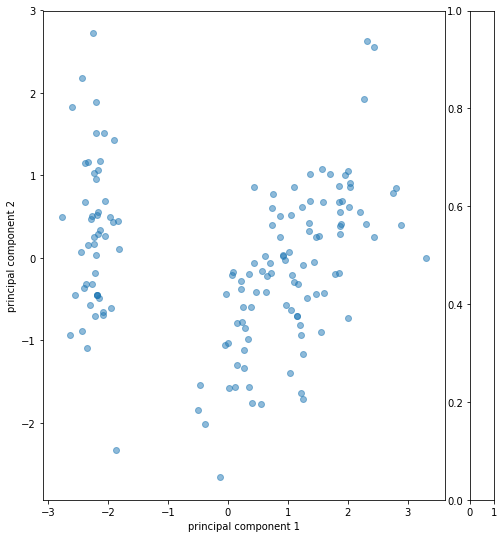

In [21]:
plt.figure(figsize=(9,9))
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.scatter(pc_df['pc1'],pc_df['pc2'],alpha=0.5,
           cmap=plt.cm.get_cmap('viridis',10))
plt.colorbar()
plt.show();

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)